In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
# Importing libraries
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import display, Image # for displaying images
%matplotlib inline
import os

In [6]:
# Getting labels of training data
labels = os.listdir('/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train')
labels

['rottenbanana',
 'freshoranges',
 'rottenoranges',
 'freshbanana',
 'rottenapples',
 'freshapples']


 ROTTENBANANA


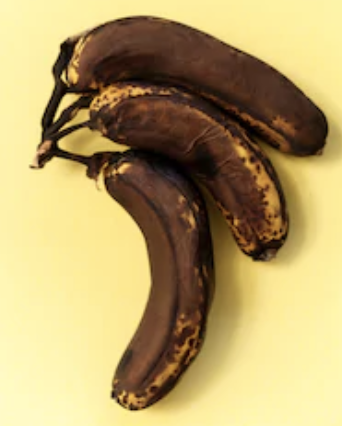

there are  2224  images in  rottenbanana class

 FRESHORANGES


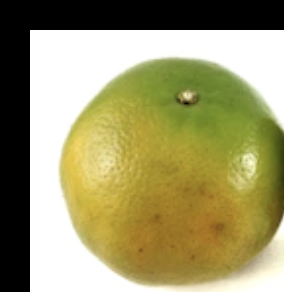

there are  1466  images in  freshoranges class

 ROTTENORANGES


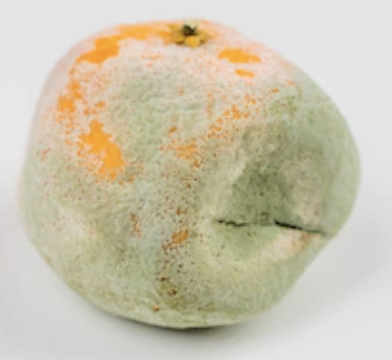

there are  1595  images in  rottenoranges class

 FRESHBANANA


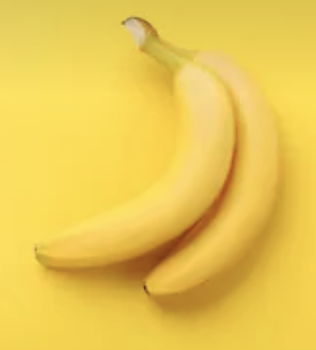

there are  1581  images in  freshbanana class

 ROTTENAPPLES


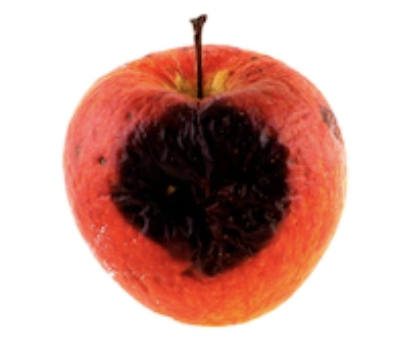

there are  2342  images in  rottenapples class

 FRESHAPPLES


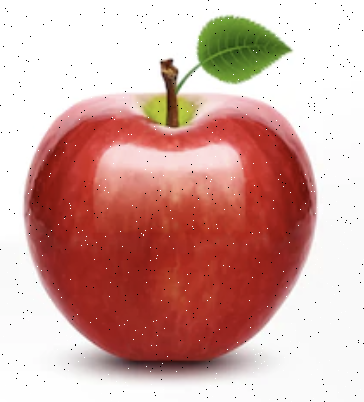

there are  1693  images in  freshapples class


In [7]:
num = []

for i in labels:
    path = '/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train/{0}/'.format(i)
    folder_data = os.listdir(path)
    k=0
    print('\n', i.upper())
    for j in folder_data:
        if(k<1):
            display(Image(path+j))
        k=k+1
    num.append(k)
    print('there are ', k,' images in ', i, 'class')

In [6]:
# Get images from files using ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


tg = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='training')
vg = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/dataset/train', target_size=(20,20), classes=labels, batch_size=25, subset='validation')

Found 8723 images belonging to 6 classes.
Found 2178 images belonging to 6 classes.


In [7]:



model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(20, 20, 3)))  # Increase filters to 64
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))  # Increase filters to 128
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))  # Increase filters to 256
model.add(tf.keras.layers.MaxPool2D((1, 1)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))


In [8]:
# Compile model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 256)         295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 256)         0

In [11]:
#
Train model
history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))

/tmp/ipykernel_47/3211304012.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=tg, steps_per_epoch=len(tg), epochs=8, validation_data=vg, validation_steps=len(vg))


Epoch 1/8
349/349 [==============================] - 156s 442ms/step - loss: 1.0111 - accuracy: 0.5968 - val_loss: 0.6081 - val_accuracy: 0.7746
Epoch 2/8
349/349 [==============================] - 79s 227ms/step - loss: 0.5848 - accuracy: 0.7887 - val_loss: 0.4485 - val_accuracy: 0.8361
Epoch 3/8
349/349 [==============================] - 78s 223ms/step - loss: 0.5055 - accuracy: 0.8184 - val_loss: 0.4291 - val_accuracy: 0.8338
Epoch 4/8
349/349 [==============================] - 75s 214ms/step - loss: 0.4134 - accuracy: 0.8425 - val_loss: 0.4152 - val_accuracy: 0.8499
Epoch 5/8
349/349 [==============================] - 79s 226ms/step - loss: 0.3898 - accuracy: 0.8572 - val_loss: 0.3128 - val_accuracy: 0.8797
Epoch 6/8
349/349 [==============================] - 80s 228ms/step - loss: 0.3413 - accuracy: 0.8739 - val_loss: 0.3274 - val_accuracy: 0.8779
Epoch 7/8
349/349 [==============================] - 75s 216ms/step - loss: 0.3165 - accuracy: 0.8870 - val_loss: 0.4537 - val_accuracy

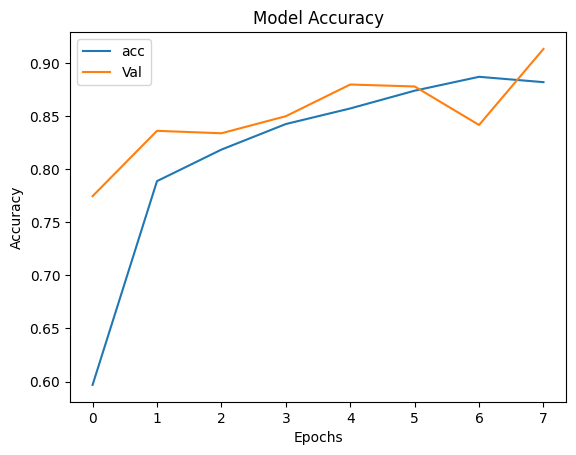

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['acc','Val'], loc = 'upper left')

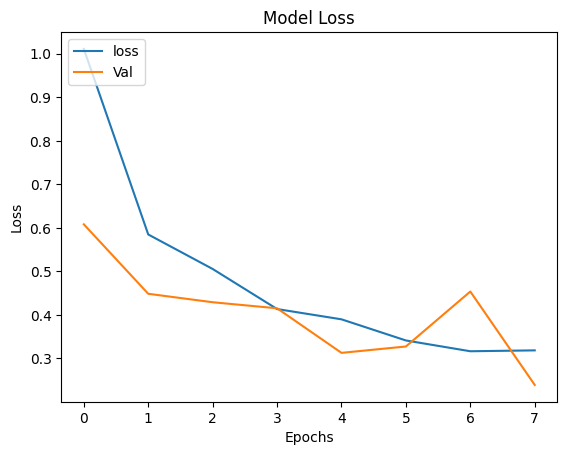

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper left')

In [14]:
test_set = datagen.flow_from_directory(directory='/kaggle/input/fruits-fresh-and-rotten-for-classification/dataset/test', target_size=(20,20), classes=labels, batch_size=25, subset='validation')


Found 538 images belonging to 6 classes.


In [15]:
prediction = model.predict(test_set)

22/22 [==============================] - 8s 376ms/step


In [ ]:
prediction

In [17]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Prompt the user to enter the file path of the image
image_path = input("Enter the file path of the image: ")

# Loading and preprocessing the single image
try:
    img = load_img(image_path, target_size=(20, 20))  # Load the image and resize it
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape the array to match expected input shape

    # Normalizing the pixel values
    img_array = img_array / 255.0 


    predictions =model.predict(img_array) 
    

    print(predictions) 

except Exception as e:
    print("Error:", e)
    print("Please check the file path and ensure it points to an image file.")

Enter the file path of the image:  /kaggle/input/mydata/WhatsApp Image 2023-11-30 at 21.42.39_ded04732.jpg


1/1 [==============================] - 0s 29ms/step
[[1.1606963e-05 2.1356648e-08 5.6504523e-06 1.4572653e-06 4.0237135e-03
  9.9595755e-01]]
